In [54]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
from skimage.io import imread
import cv2

In [55]:
IMAGE_WIDTH=32
IMAGE_HEIGHT=32
IMAGE_CHANNELS=3
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
BATCH_SIZE = 32
EPOCHS = 10

In [56]:
ROOT_PATH = os.getcwd()

In [57]:
TRAIN_PATH_angry = ROOT_PATH + "\\..\\data\\images\\train\\angry\\"
TRAIN_PATH_disgust = ROOT_PATH + "\\..\\data\\images\\train\\disgust\\"
TRAIN_PATH_fear = ROOT_PATH + "\\..\\data\\images\\train\\fear\\"
TRAIN_PATH_happy = ROOT_PATH + "\\..\\data\\images\\train\\happy\\"
TRAIN_PATH_neutral = ROOT_PATH + "\\..\\data\\images\\train\\neutral\\"
TRAIN_PATH_sad = ROOT_PATH + "\\..\\data\\images\\train\\sad\\"
TRAIN_PATH_surprise = ROOT_PATH + "\\..\\data\\images\\train\\surprise\\"

In [58]:

filenames_angry = os.listdir(TRAIN_PATH_angry)

    
df_1 = pd.DataFrame({
    'filename': filenames_angry,
    'category': 'angry'
})

filenames_disgust = os.listdir(TRAIN_PATH_disgust)

    
df_2 = pd.DataFrame({
    'filename': filenames_disgust,
    'category': 'disgust'
})

filenames_fear = os.listdir(TRAIN_PATH_fear)

    
df_3 = pd.DataFrame({
    'filename': filenames_fear,
    'category': 'fear'
})

filenames_happy = os.listdir(TRAIN_PATH_happy)

    
df_4 = pd.DataFrame({
    'filename': filenames_happy,
    'category': 'happy'
})

filenames_neutral = os.listdir(TRAIN_PATH_neutral)

    
df_5 = pd.DataFrame({
    'filename': filenames_neutral,
    'category': 'neutral'
})

filenames_sad = os.listdir(TRAIN_PATH_sad)

    
df_6 = pd.DataFrame({
    'filename': filenames_sad,
    'category': 'sad'
})

filenames_surprise = os.listdir(TRAIN_PATH_surprise)

    
df_7 = pd.DataFrame({
    'filename': filenames_surprise,
    'category': 'surprise'
})



In [59]:
df_train = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7])

In [60]:
df_train

,filename,category
0,0.jpg,angry
1,1.jpg,angry
2,10.jpg,angry
3,10002.jpg,angry
4,10016.jpg,angry
...,...,...
3200,9969.jpg,surprise
3201,9985.jpg,surprise
3202,9990.jpg,surprise
3203,9992.jpg,surprise


In [61]:
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad','surprise']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
class_names_label

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [62]:
def read_data(path, im_size):
    X = []
    Y = []

    ##### CODE #####
    # Iterar sobre todo lo que haya en path
    for file in os.listdir(path):
        
        # Leer la imagen a color y aplicarle el resize
        image = imread(path + file)
        smallimage = cv2.resize(image, (im_size, im_size))
        
        # Guardo en X
        X.append(smallimage)
        '''
        category = file.split('.')[0]
        # Miro si es perro y gato para guardar en Y
        if category == 'angry':
            Y.append(1)
        elif category == 'disgust':
            Y.append(2)
        elif category == 'fear':
            Y.append(3)
        elif category == 'happy':
            Y.append(4)
        elif category == 'neutral':
            Y.append(5)
        elif category == 'sad':
            Y.append(6)
        elif category == 'surprise':
            Y.append(7)'''

    return np.array(X)
    

X_train1 = read_data(TRAIN_PATH_angry, IMAGE_WIDTH)
#X_test1, y_test1 = read_data(TEST_PATH_angry, IMAGE_WIDTH)
X_train2 = read_data(TRAIN_PATH_disgust, IMAGE_WIDTH)
#X_test2, y_test2 = read_data(TEST_PATH_forest, IMAGE_WIDTH)
X_train3= read_data(TRAIN_PATH_fear, IMAGE_WIDTH)
#X_test3, y_test3 = read_data(TEST_PATH_glacier, IMAGE_WIDTH)
X_train4 = read_data(TRAIN_PATH_happy, IMAGE_WIDTH)
#X_test4, y_test4 = read_data(TEST_PATH_mountain, IMAGE_WIDTH)
X_train5 = read_data(TRAIN_PATH_neutral, IMAGE_WIDTH)
#X_test5, y_test5 = read_data(TEST_PATH_sea, IMAGE_WIDTH)
X_train6 = read_data(TRAIN_PATH_sad, IMAGE_WIDTH)
#X_test6, y_test6 = read_data(TEST_PATH_street, IMAGE_WIDTH)
X_train7 = read_data(TRAIN_PATH_surprise, IMAGE_WIDTH)
#X_test6, y_test6 = read_data(TEST_PATH_street, IMAGE_WIDTH)

In [68]:
X_train2.shape

(436, 32, 32)

In [69]:
X_train = np.vstack((X_train1, X_train2, X_train3, X_train4, X_train5, X_train6,X_train7))

In [71]:
X_train.shape

(28821, 32, 32)

In [76]:
df_train['numero_categoria'] = df_train['category'].map(class_names_label)

In [78]:
X_test = df_train['numero_categoria']

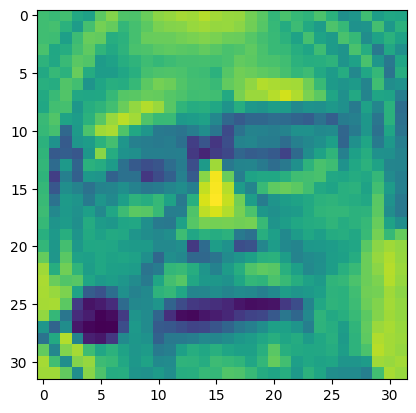

In [79]:
plt.imshow(X_train[1]);

In [81]:
print("Min:", np.min(X_train))
print("Max:", np.max(X_train))

Min: 0
Max: 255


In [82]:
X_train = X_train / 255.0

In [83]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical